In [12]:
from pathlib import Path
import matplotlib.pyplot as plt
import json
from tqdm.notebook import tqdm

In [18]:
base_path = Path("outputs")
vae_bf16_path = base_path / "vae-text-bf16"
vae_fp32_path = base_path / "vae-fp32"
vae_text_bf16_path = base_path / "vae-text-bf16"
vae_bf16_first_checkpoint = base_path / "vae-bf16-first-ckpt"

In [19]:
def load_metrics(base: Path):
    psnrs = []
    ssims = []
    mses = []
    for path in tqdm(list((base / "validation").glob("*")), desc=f"Scanning {base}", leave=False):
        if path.is_file():
            continue
        with open(path / "metrics.json", "r") as f:
            metrics = json.load(f)
            psnrs.append(metrics["psnr"])
            ssims.append(metrics["ssim"])
            mses.append(metrics["mse"])
    return psnrs, ssims, mses

In [20]:
vae_bf16_metrics = load_metrics(vae_bf16_path)
vae_fp32_metrics = load_metrics(vae_fp32_path)
vae_text_bf16_metrics = load_metrics(vae_text_bf16_path)
vae_bf16_first_checkpoint_metrics = load_metrics(vae_bf16_first_checkpoint)
metric_names = ["psnr", "ssim", "mse"]
metrics = {
    "vae_bf16": vae_bf16_metrics,
    "vae_fp32": vae_fp32_metrics,
    "vae_text_bf16": vae_text_bf16_metrics,
    "vae_bf16_first_checkpoint": vae_bf16_first_checkpoint_metrics,
}

Scanning outputs/vae-text-bf16:   0%|          | 0/3040 [00:00<?, ?it/s]

Scanning outputs/vae-fp32:   0%|          | 0/3040 [00:00<?, ?it/s]

Scanning outputs/vae-text-bf16:   0%|          | 0/3040 [00:00<?, ?it/s]

Scanning outputs/vae-bf16-first-ckpt:   0%|          | 0/1376 [00:00<?, ?it/s]

Plots

/tmp/ipykernel_784490/252790319.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


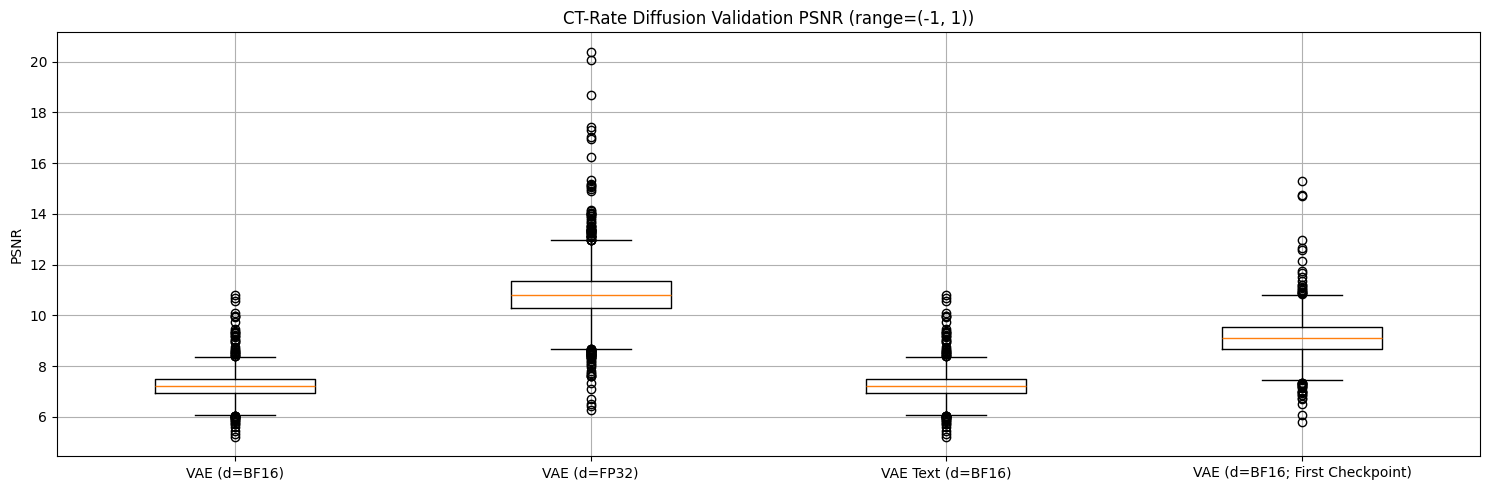

In [27]:
plt.figure(figsize=(15,5))
plt.boxplot(
    [metrics["vae_bf16"][0], metrics["vae_fp32"][0], metrics["vae_text_bf16"][0], metrics["vae_bf16_first_checkpoint"][0]],
    labels=["VAE (d=BF16)", "VAE (d=FP32)", "VAE Text (d=BF16)", "VAE (d=BF16; First Checkpoint)"],
)
plt.title("CT-Rate Diffusion Validation PSNR (range=(-1, 1))")
plt.ylabel("PSNR")
plt.grid()
plt.tight_layout()

/tmp/ipykernel_784490/2252309273.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


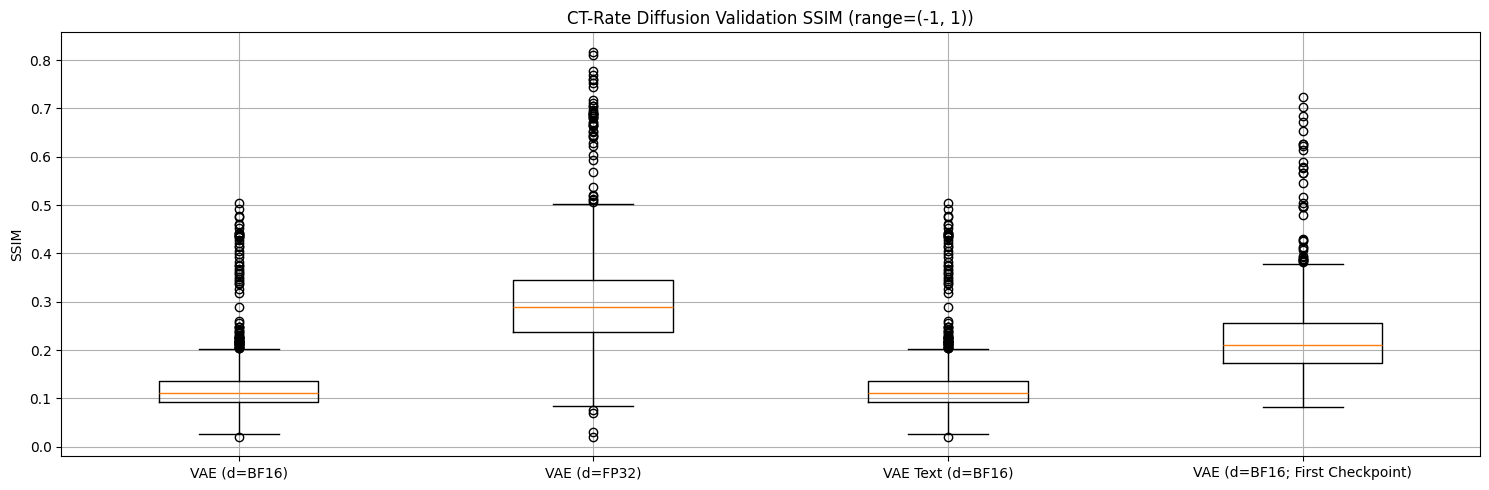

In [28]:
plt.figure(figsize=(15,5))
plt.boxplot(
    [metrics["vae_bf16"][1], metrics["vae_fp32"][1], metrics["vae_text_bf16"][1], metrics["vae_bf16_first_checkpoint"][1]],
    labels=["VAE (d=BF16)", "VAE (d=FP32)", "VAE Text (d=BF16)", "VAE (d=BF16; First Checkpoint)"],
)
plt.title("CT-Rate Diffusion Validation SSIM (range=(-1, 1))")
plt.ylabel("SSIM")
plt.grid()
plt.tight_layout()

/tmp/ipykernel_784490/1412026722.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


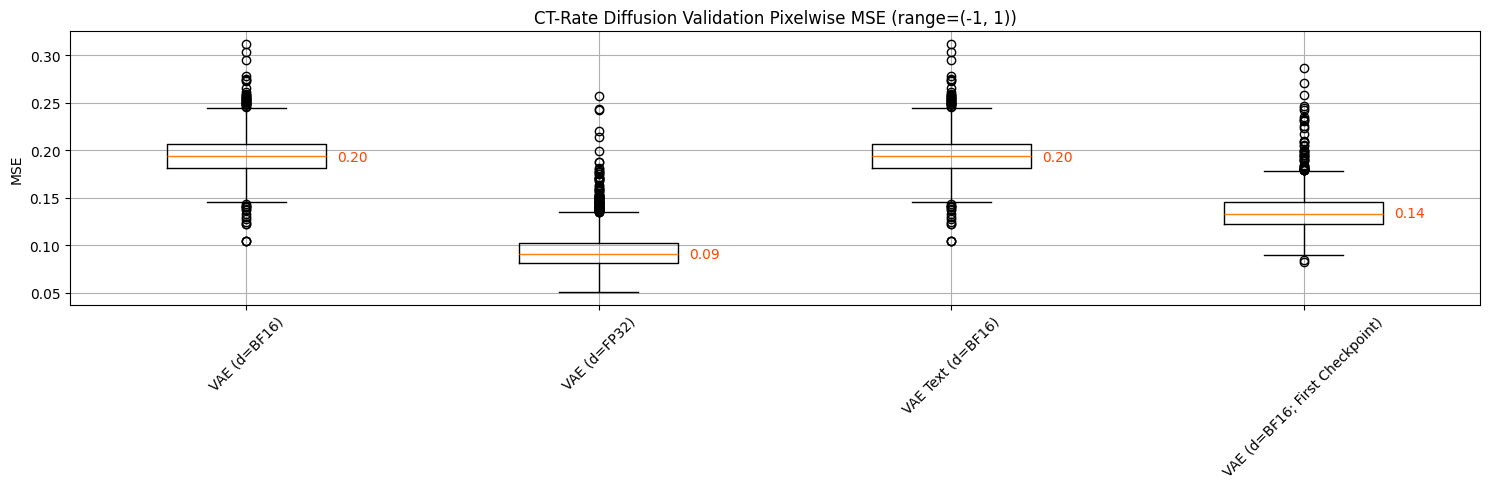

In [47]:
plt.figure(figsize=(15,5))
plt.boxplot(
    [metrics["vae_bf16"][2], metrics["vae_fp32"][2], metrics["vae_text_bf16"][2], metrics["vae_bf16_first_checkpoint"][2]],
    labels=["VAE (d=BF16)", "VAE (d=FP32)", "VAE Text (d=BF16)", "VAE (d=BF16; First Checkpoint)"],
)
# Add text with average values next to the boxplot
for i, (key, values) in enumerate(metrics.items()):
    avg_mse = sum(values[2]) / len(values[2])
    plt.text(i + 1.3, avg_mse - 0.01, f"{avg_mse:.2f}", ha='center', va='bottom', color='orangered', fontsize=10)
plt.xticks(rotation=45)
plt.title("CT-Rate Diffusion Validation Pixelwise MSE (range=(-1, 1))")
plt.ylabel("MSE")
plt.grid()
plt.tight_layout()